Slacks post: Friday 29th April 2022.

Checking wall-particle interactions for potentials available under fix/wall-region, LAMMPS. 

url: https://docs.lammps.org/fix_wall_region.html


For water, the LJ potential paramters are $σ = 2.725 \left( Å \right)$ and $\epsilon = 4.9115 \left( \times 10^{-21} J \right)$. 

url: https://link.springer.com/article/10.1007/s00707-004-0134-x 

$r$ is the distance between two interacting particles, 

$\epsilon$ is the depth of the potential well (usually referred to as 'dispersion energy'), and 

$\sigma$ is the distance at which the particle-particle potential energy $E$ is zero (often referred to as 'size of the particle'). 

url: https://en.wikipedia.org/wiki/Lennard-Jones_potential 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [2]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom

#LJ9-3

For style lj93, the energy $E$ is given by the 9/3 potential: 

$E = \epsilon \left[ \frac{2}{15} \left(\frac{\sigma}{r} \right)^9 - \left(\frac{\sigma}{r} \right)^3 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[ 9\times\frac{2}{15} \left(\frac{\sigma}{r} \right)^{10} - 3\times\left(\frac{\sigma}{r} \right)^4 \right] \quad \implies \quad 9\times\frac{2}{15} \left(\frac{\sigma}{r} \right)^{10} = 3\times\left(\frac{\sigma}{r} \right)^4 \quad \implies \quad \left(\frac{\sigma}{r} \right)^{6} = \frac{3\times15}{2\times9}$

$r_{min} = \frac{5}{2}^{\left(\frac{1}{6}\right)}σ$

(-10.0, 10.0)

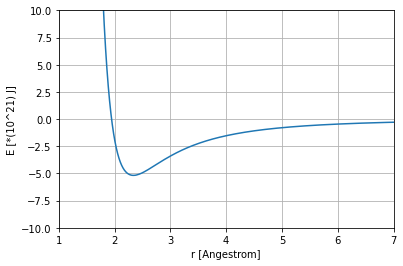

In [16]:
r_min = ((5/2)**(1/6))*sig
distance = np.linspace(1, 25, 1000, False)
LJ93 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ93[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3))
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, LJ93)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([1, 7])
plt.ylim([-10, 10])

#LJ12-6

For style lj126, the energy $E$ is given by the 12/6 potential:

$E = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[ 12\times\left(\frac{\sigma}{r} \right)^{13} - 6\times\left(\frac{\sigma}{r} \right)^7 \right]  \quad \implies \quad 12\left(\frac{\sigma}{r} \right)^{13} = 6\times\left(\frac{\sigma}{r} \right)^7 \quad \implies \quad \left(\frac{\sigma}{r} \right)^{6} = \frac{6}{12}$

$r_{min} = 2^{\frac{1}{6}}σ$

(-10.0, 10.0)

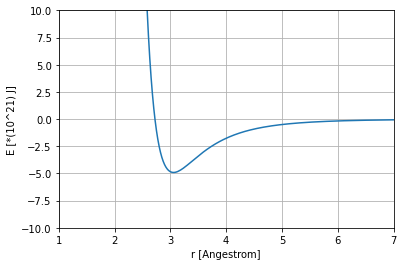

In [17]:
r_min = (2**(1/6)) * sig 
distance = np.linspace(1, 25, 1000, False)
LJ126 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ126[index] = 4*eps*(((sig/r)**12)-((sig/r)**6))
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, LJ126)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([1, 7])
plt.ylim([-10, 10])

#LJ10-4-3

For style wall/lj1043, the energy $E$ is given by the 10/4/3 potential:

$E = 2π\epsilon \left[\frac{2}{5} \left(\frac{\sigma}{r} \right)^{10} - \left(\frac{\sigma}{r} \right)^4 - \frac{\sqrt{2}σ^3}{3\left( r + \left( \frac{0.61}{\sqrt{2}}\right)\sigma\right)^3}\right]          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[10\times\frac{2}{5} \left(\frac{\sigma}{r} \right)^{11} - 4×\left(\frac{\sigma}{r} \right)^5 + 3\times\frac{\sqrt{2}σ^3}{3\left( r + \left( \frac{0.61}{\sqrt{2}}\right)\sigma\right)^4}\right]$

$r_{min} = 2.73946825$, see plot bellow 

Text(0, 0.5, 'dE/dr')

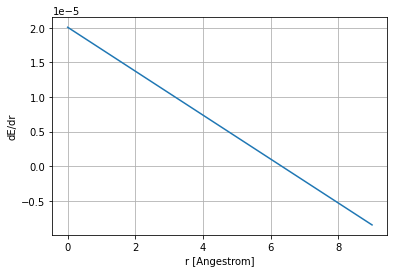

In [18]:
dE = []
R = np.linspace(2739.4665, 2739.470, 10)
for rr in R: 
  r = rr / 1000
  dummy = 10*(2/5)*((sig/r)**11) - 4*((sig/r)**5) + 3*(math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**4))
  dE.append(dummy)
#plt.figure(figsize=(10,7.5))
plt.plot(dE)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('dE/dr')

(-25.0, 15.0)

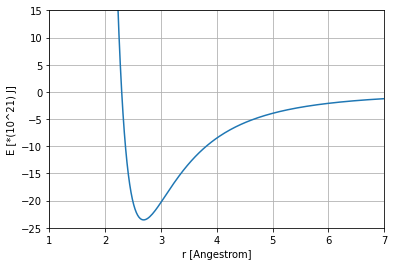

In [19]:
r_min = 2.73946825
distance = np.linspace(1, 25, 1000, False)
LJ1043 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ1043[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3))))
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, LJ1043)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([1, 7])
plt.ylim([-25, 15])

#harmonic

For style wall/harmonic, the energy $E$ is given by a harmonic spring potential (the distance parameter is ignored):

$E = ϵ \left( r - r_c \right)^2          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 2\times\left( r - r_c \right) = 0 \quad \implies \quad r_{min} = r_c \quad \cdot\cdot\cdot\cdot \quad$ ***arbitrary***

(-5.0, 25.0)

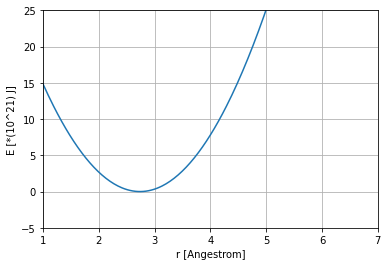

In [20]:
r_min = 2.73946825
rc = r_min
distance = np.linspace(1, 25, 1000, False)
harm = np.zeros(len(distance))
index = 0
for r in distance:
  harm[index] = eps*((r - rc)**2)
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, harm)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([1, 7])
plt.ylim([-5, 25])

#Morse

For style wall/morse, the energy $E$ is given by the Morse potential:

$E = D_0 \left[ e^{-2α\left( r - r_0 \right)} - 2e^{-α\left( r - r_0 \right)} \right]          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad D_0 \left[ {-2α}e^{-2α\left( r - r_0 \right)} +2αe^{-α\left( r - r_0 \right)} \right] = 0 \quad \implies \quad r_{min} = r_0 \quad \cdot\cdot\cdot\cdot \quad$ ***arbitrary***

Text(0, 0.5, 'E [*(10^21) J]')

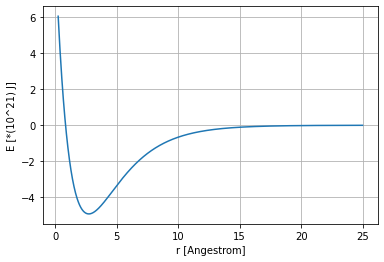

In [21]:
r_min = 2.73946825
r_0 = r_min
distance = np.linspace(0.25, 25, 1000, False)
morse = np.zeros(len(distance))
D_0 = eps #depth of the potential (energy units)
alpha = 1/sig #width parameter (1/distance units)
index = 0
for r in distance:
  morse[index] = D_0*(math.exp(-2*alpha*(r - r_0)) - 2*math.exp(-alpha*(r - r_0)))
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, morse)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')

#LJ-PNAS

For style PNAS(lj126), the energy $E$ is given by the 12/6 potential:

$E = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[ 12\times\left(\frac{\sigma}{r} \right)^{13} - 6\times c\times\left(\frac{\sigma}{r} \right)^7 \right]  \quad \implies \quad 12\left(\frac{\sigma}{r} \right)^{13} = 6c\times\left(\frac{\sigma}{r} \right)^7 \quad \implies \quad \left(\frac{\sigma}{r} \right)^{6} = \frac{6c}{12}$

$r_{min} = \left(\frac{2}{c}\right)^{\frac{1}{6}}σ$

**The $r_{min}$ depends on the value of $c$, hydrophilic/hydrophobic parameter.** 

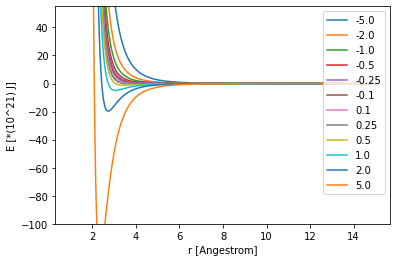

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'r minimum')

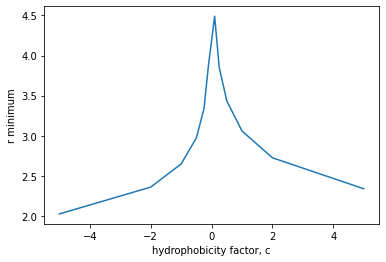

In [23]:
C = [-5, -2, -1, -0.5, -0.25, -0.1, 0.1, 0.25, 0.5, 1, 2, 5]
Rm = []
#plt.figure(figsize=(10,7.5))
for c in C:
  r_min = ((2/c)**(1/6)) * sig 
  Rm.append(r_min)
  distance = np.linspace(1, 15, 1000, False)
  pnas = np.zeros(len(distance))
  index = 0
  for r in distance:
    pnas[index] = 4*eps*(((sig/r)**12)-c*((sig/r)**6))
    index = index + 1
  plt.plot(distance, pnas, label = float(f'{c:.2f}'))
  plt.grid()
  plt.ylim((-100,55))
  plt.legend(loc='upper right')
  plt.xlabel('r [Angestrom]')
  plt.ylabel('E [*(10^21) J]')
plt.show()
#plt.figure(figsize=(10,7.5))
plt.plot(C, Rm)
plt.xlabel('hydrophobicity factor, c')
plt.ylabel('r minimum')

#Overlay of all (except PNAS)

Text(0, 0.5, 'E [*(10^21) J]')

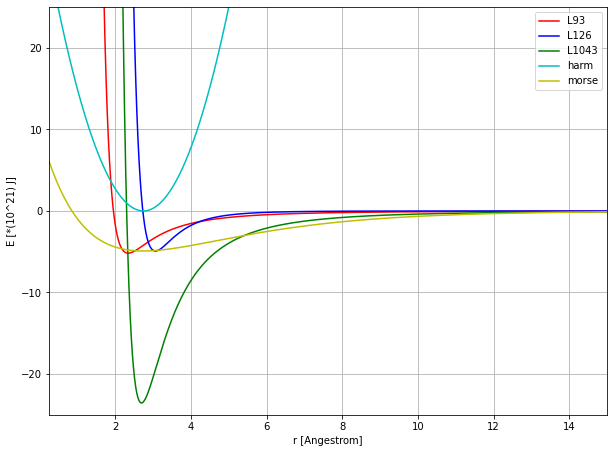

In [10]:
LJ93_r_min = ((5/2)**(1/6))*sig
LJ126_r_min_ = (2**(1/6)) * sig 
LJ1043_r_min = 2.73946825
harm_r_min = 2.73946825
harm_rc = harm_r_min
morse_r_min = 2.73946825
morse_r_0 = morse_r_min
morse_D_0  = eps #depth of the potential (energy units)
morse_alpha = 1/sig #width parameter (1/distance units)
#
distance = np.linspace(0.25, 15, 1000, False)
#
LJ93 = np.zeros(len(distance))
LJ126 = np.zeros(len(distance))
LJ1043 = np.zeros(len(distance))
harm = np.zeros(len(distance))
morse = np.zeros(len(distance))
#
index = 0
for r in distance:
  LJ93[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3))
  LJ126[index] = 4*eps*(((sig/r)**12)-((sig/r)**6))
  LJ1043[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3))))
  harm[index] = eps*((r - harm_rc)**2)
  morse[index] = morse_D_0*(math.exp(-2*morse_alpha*(r - morse_r_0)) - 2*math.exp(-morse_alpha*(r - morse_r_0)))
  index = index + 1
fig, ax = plt.subplots(figsize=(10,7.5))
ax.plot(distance, LJ93, 'r', label='L93')
ax.plot(distance, LJ126, 'b', label='L126')
ax.plot(distance, LJ1043, 'g', label='L1043')
ax.plot(distance, harm, 'c', label='harm')
ax.plot(distance, morse, 'y', label='morse')
ax.grid()
ax.set_xlim([0.25, 15])
ax.set_ylim([-25, 25])
ax.legend()
ax.set_xlabel('r [Angestrom]')
ax.set_ylabel('E [*(10^21) J]')

#Fitting PNAS to Morse

$E_{PNAS} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

$E_{Morse} = D_0 \left[ e^{-2α\left( r - r_0 \right)} - 2e^{-α\left( r - r_0 \right)} \right]          \quad \quad$ for $\quad \quad$ $r < r_c$

while changing $c$, looking for $D_0$, and $\alpha$ subject to: 

$|D_0 \left[ e^{-2α\left( r - r_0 \right)} - 2e^{-α\left( r - r_0 \right)} \right] - 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right]| \implies 0$

In [11]:
C = [-5, -1, -0.5, -0.1, 0.1, 0.5, 1, 5] 
distance = np.linspace(0.15, 25, 10, False)
#D_0 = eps #depth of the potential (energy units)
#alpha = 1/sig #width parameter (1/distance units)
D_0 = np.linspace(-1e2, 1e2, 100, False)
Alpha = np.linspace(1, 5, 100, False)
best_d_0 = []
best_alpha = []
best_c = []
# 
for c in C:
  r_min = ((2/c)**(1/6)) * sig 
  r_0 = r_min.real
  track_d_0 = []
  track_alpha = []
  track_Err = []
  for d_0 in D_0:
    for alpha in Alpha:
      for r in distance:
        Err = d_0*(math.exp(-2*alpha*(r - r_0)) - 2*math.exp(-alpha*(r - r_0))) - 4*eps*((sig/r)**12 - c*(sig/r)**6)
        Err = abs(Err)
        if Err < 1e-2:
          track_d_0.append(d_0)
          track_alpha.append(alpha)
          track_Err.append(Err)
  best_d_0.append(track_d_0[track_Err.index(min(track_Err))])
  best_alpha.append(track_alpha[track_Err.index(min(track_Err))])
  best_c.append(c)

Text(0, 0.5, 'values of D0 in Morse')

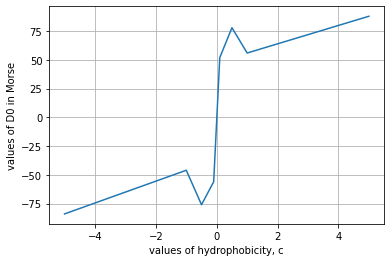

In [24]:
fig1, ax_d_0 = plt.subplots()#figsize=(10,7.5))
ax_d_0.plot(best_c, best_d_0)
ax_d_0.grid()
ax_d_0.set_xlabel('values of hydrophobicity, c')
ax_d_0.set_ylabel('values of D0 in Morse')

Text(0, 0.5, 'values of alpha in Morse')

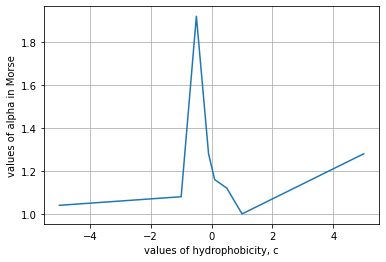

In [25]:
fig2, ax_alpha = plt.subplots()#figsize=(10,7.5))
ax_alpha.plot(best_c, best_alpha)
ax_alpha.grid()
ax_alpha.set_xlabel('values of hydrophobicity, c')
ax_alpha.set_ylabel('values of alpha in Morse')

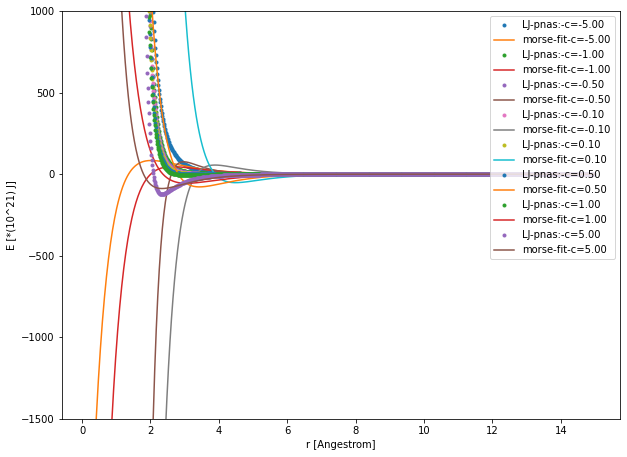

In [26]:
distance = np.linspace(0.15, 15, 1000, False)
index1 = 0
C = [-5, -1, -0.5, -0.1, 0.1, 0.5, 1, 5] 
plt.figure(figsize=(10,7.5))
for c in C:
  r_min = ((2/c)**(1/6)) * sig 
  r_0 = r_min.real
  D_0 = best_d_0[index1] 
  alpha = best_alpha[index1] 
  index1 = index1 + 1
  pnas = np.zeros(len(distance))
  morse = np.zeros(len(distance))
  index = 0
  for r in distance:
    pnas[index] = 4*eps*(((sig/r)**12)-c*((sig/r)**6))
    morse[index] = D_0*(math.exp(-2*alpha*(r - r_0)) - 2*math.exp(-alpha*(r - r_0)))
    index = index + 1
  
  plt.plot(distance, pnas, '.',label = 'LJ-pnas:''-c='f'{c:.2f}')
  plt.plot(distance, morse, '-',label = 'morse-fit''-c='f'{c:.2f}')
  plt.grid()
  plt.ylim((-1500,1000))
  plt.legend(loc='upper right')
  plt.xlabel('r [Angestrom]')
  plt.ylabel('E [*(10^21) J]')
plt.show()

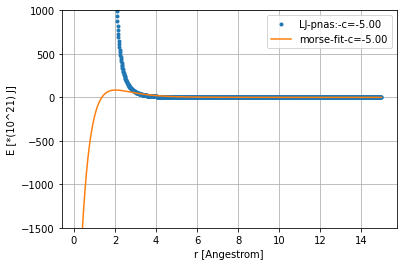

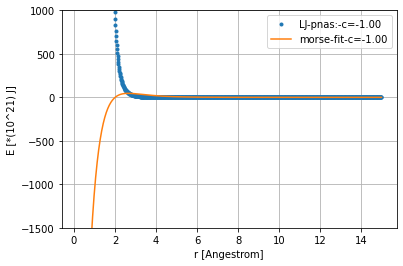

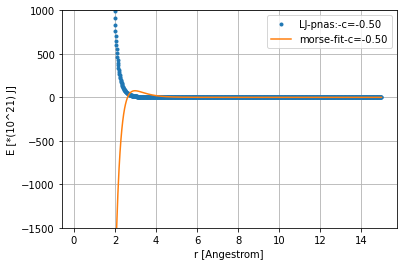

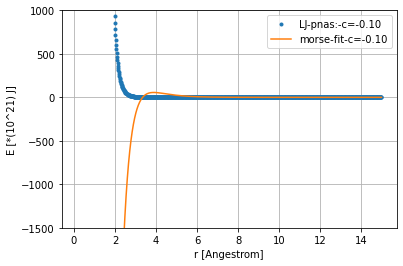

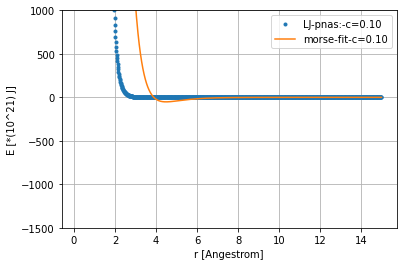

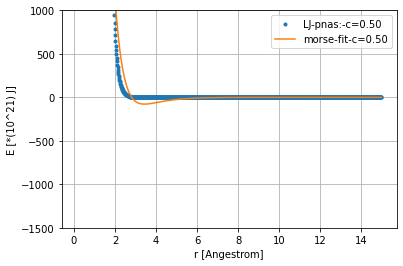

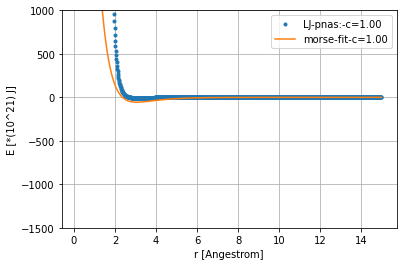

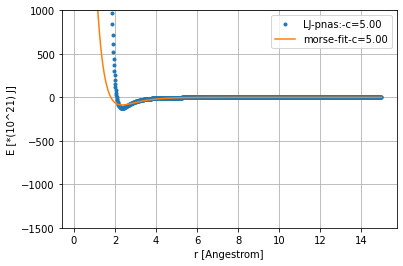

In [27]:
distance = np.linspace(0.15, 15, 1000, False)
index1 = 0
C = [-5, -1, -0.5, -0.1, 0.1, 0.5, 1, 5] 
for c in C:
  r_min = ((2/c)**(1/6)) * sig 
  r_0 = r_min.real
  D_0 = best_d_0[index1] 
  alpha = best_alpha[index1] 
  index1 = index1 + 1
  pnas = np.zeros(len(distance))
  morse = np.zeros(len(distance))
  index = 0
  for r in distance:
    pnas[index] = 4*eps*(((sig/r)**12)-c*((sig/r)**6))
    morse[index] = D_0*(math.exp(-2*alpha*(r - r_0)) - 2*math.exp(-alpha*(r - r_0)))
    index = index + 1
  #plt.figure(figsize=(10,7.5))
  plt.plot(distance, pnas, '.',label = 'LJ-pnas:''-c='f'{c:.2f}')
  plt.plot(distance, morse, '-',label = 'morse-fit''-c='f'{c:.2f}')
  plt.grid()
  plt.ylim((-1500,1000))
  plt.legend(loc='upper right')
  plt.xlabel('r [Angestrom]')
  plt.ylabel('E [*(10^21) J]')
  plt.show()